In [1]:
import nltk
from nltk.corpus import stopwords 
from nltk.corpus import inaugural
from nltk.tokenize import word_tokenize, sent_tokenize
import matplotlib.pyplot as plt
import pyphen
from wordcloud import WordCloud

Starting with getting the president's speeches and doing a small analysis based on the average length of words used, the average no of words used per sentence etc.

In [2]:
names=inaugural.fileids()
print(len(names))

56


In [3]:
names[0],names[55]

('1789-Washington.txt', '2009-Obama.txt')

In [4]:
inaugural.raw(fileids=names[55])

'My fellow citizens:\n\nI stand here today humbled by the task before us, grateful for the trust you have bestowed, mindful of the sacrifices borne by our ancestors. I thank President Bush for his service to our nation, as well as the generosity and cooperation he has shown throughout this transition.\n\nForty-four Americans have now taken the presidential oath. The words have been spoken during rising tides of prosperity and the still waters of peace. Yet, every so often the oath is taken amidst gathering clouds and raging storms. At these moments, America has carried on not simply because of the skill or vision of those in high office, but because We the People have remained faithful to the ideals of our forbearers, and true to our founding documents.\n\nSo it has been. So it must be with this generation of Americans.\n\nThat we are in the midst of crisis is now well understood. Our nation is at war, against a far-reaching network of violence and hatred. Our economy is badly weakened

In [5]:
words=list(inaugural.words(fileids = names[55]))
words

['My',
 'fellow',
 'citizens',
 ':',
 'I',
 'stand',
 'here',
 'today',
 'humbled',
 'by',
 'the',
 'task',
 'before',
 'us',
 ',',
 'grateful',
 'for',
 'the',
 'trust',
 'you',
 'have',
 'bestowed',
 ',',
 'mindful',
 'of',
 'the',
 'sacrifices',
 'borne',
 'by',
 'our',
 'ancestors',
 '.',
 'I',
 'thank',
 'President',
 'Bush',
 'for',
 'his',
 'service',
 'to',
 'our',
 'nation',
 ',',
 'as',
 'well',
 'as',
 'the',
 'generosity',
 'and',
 'cooperation',
 'he',
 'has',
 'shown',
 'throughout',
 'this',
 'transition',
 '.',
 'Forty',
 '-',
 'four',
 'Americans',
 'have',
 'now',
 'taken',
 'the',
 'presidential',
 'oath',
 '.',
 'The',
 'words',
 'have',
 'been',
 'spoken',
 'during',
 'rising',
 'tides',
 'of',
 'prosperity',
 'and',
 'the',
 'still',
 'waters',
 'of',
 'peace',
 '.',
 'Yet',
 ',',
 'every',
 'so',
 'often',
 'the',
 'oath',
 'is',
 'taken',
 'amidst',
 'gathering',
 'clouds',
 'and',
 'raging',
 'storms',
 '.',
 'At',
 'these',
 'moments',
 ',',
 'America',
 'has'

In [6]:
nltk.FreqDist(words)

FreqDist({',': 130, 'the': 126, '.': 108, 'and': 105, 'of': 82, 'to': 66, 'our': 58, 'we': 50, 'that': 48, 'a': 47, ...})

In [7]:
stop_words = stopwords.words('english')
add_to_stop_words=[',','.','-',';',':','--',"'",'(',')']
stop_words.extend(add_to_stop_words)
stop_words=set(stop_words)

In [8]:
stop_words

{"'",
 '(',
 ')',
 ',',
 '-',
 '--',
 '.',
 ':',
 ';',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'ou

In [9]:
for i in stop_words:
    if i in words:
        while i in words:
            words.remove(i)

In [10]:
nltk.FreqDist(words)

FreqDist({'us': 23, 'nation': 12, 'We': 12, 'new': 11, 'America': 10, 'The': 9, 'Our': 9, 'every': 8, 'must': 8, 'For': 8, ...})

Now we start counting how many 2,3,4 letter words president xyz used.

We then take the average letter count per word of each president and plot it.

A higher letter count per word would mean the president mostly used "big" words.

When we see the graph, we see that it has decreased over time.

In [11]:
#counts number of words of a particular length
def countwords(dic,length):
    tsum=0
    for i in dic:
        if len(i)==length:
            tsum=tsum+dic[i]
            #print(i,dic[i])
    return tsum 

In [12]:
#counting 2 letter words, 3 letter words etc
presidents_avg=[]
for x in names:
    words=inaugural.words(fileids=x)
    fdist=nltk.FreqDist(words)
    print("For president ",x[:-4])
    avg=0
    totalnoofwords=0
    for i in range(1,20):
        tsum=countwords(fdist,i)
        avg=avg+tsum*i
        totalnoofwords=totalnoofwords+tsum
        print("No of words of length ",i, " are " ,tsum)
    avg=avg/totalnoofwords
    print(avg)
    presidents_avg.append(avg)
    

For president  1789-Washington
No of words of length  1  are  142
No of words of length  2  are  306
No of words of length  3  are  263
No of words of length  4  are  185
No of words of length  5  are  162
No of words of length  6  are  105
No of words of length  7  are  81
No of words of length  8  are  83
No of words of length  9  are  65
No of words of length  10  are  59
No of words of length  11  are  32
No of words of length  12  are  30
No of words of length  13  are  13
No of words of length  14  are  9
No of words of length  15  are  3
No of words of length  16  are  0
No of words of length  17  are  0
No of words of length  18  are  0
No of words of length  19  are  0
4.669050715214564
For president  1793-Washington
No of words of length  1  are  18
No of words of length  2  are  33
No of words of length  3  are  27
No of words of length  4  are  12
No of words of length  5  are  11
No of words of length  6  are  9
No of words of length  7  are  9
No of words of length  8  ar

No of words of length  16  are  0
No of words of length  17  are  0
No of words of length  18  are  0
No of words of length  19  are  0
4.508715300193673
For president  1861-Lincoln
No of words of length  1  are  455
No of words of length  2  are  800
No of words of length  3  are  749
No of words of length  4  are  511
No of words of length  5  are  389
No of words of length  6  are  254
No of words of length  7  are  232
No of words of length  8  are  197
No of words of length  9  are  144
No of words of length  10  are  133
No of words of length  11  are  54
No of words of length  12  are  51
No of words of length  13  are  17
No of words of length  14  are  15
No of words of length  15  are  2
No of words of length  16  are  2
No of words of length  17  are  0
No of words of length  18  are  0
No of words of length  19  are  0
4.329588014981273
For president  1865-Lincoln
No of words of length  1  are  89
No of words of length  2  are  131
No of words of length  3  are  177
No of w

For president  1925-Coolidge
No of words of length  1  are  470
No of words of length  2  are  811
No of words of length  3  are  873
No of words of length  4  are  578
No of words of length  5  are  391
No of words of length  6  are  281
No of words of length  7  are  319
No of words of length  8  are  201
No of words of length  9  are  182
No of words of length  10  are  150
No of words of length  11  are  89
No of words of length  12  are  48
No of words of length  13  are  25
No of words of length  14  are  19
No of words of length  15  are  3
No of words of length  16  are  1
No of words of length  17  are  1
No of words of length  18  are  0
No of words of length  19  are  0
4.4725348941918055
For president  1929-Hoover
No of words of length  1  are  382
No of words of length  2  are  715
No of words of length  3  are  768
No of words of length  4  are  441
No of words of length  5  are  303
No of words of length  6  are  270
No of words of length  7  are  276
No of words of leng

No of words of length  9  are  71
No of words of length  10  are  61
No of words of length  11  are  23
No of words of length  12  are  18
No of words of length  13  are  8
No of words of length  14  are  2
No of words of length  15  are  1
No of words of length  16  are  3
No of words of length  17  are  0
No of words of length  18  are  0
No of words of length  19  are  0
4.053292600135777
For president  1989-Bush
No of words of length  1  are  486
No of words of length  2  are  437
No of words of length  3  are  556
No of words of length  4  are  435
No of words of length  5  are  253
No of words of length  6  are  184
No of words of length  7  are  147
No of words of length  8  are  72
No of words of length  9  are  60
No of words of length  10  are  51
No of words of length  11  are  17
No of words of length  12  are  9
No of words of length  13  are  3
No of words of length  14  are  3
No of words of length  15  are  0
No of words of length  16  are  0
No of words of length  17  

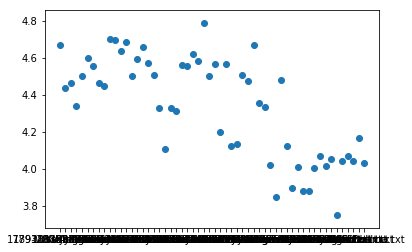

In [13]:
plt.scatter(names,presidents_avg)
plt.show()

Now we start counting how many words were spoken by president xyz in one sentence.

We then take the average word count per sentence for each president and plot it.

A higher average word count per sentence would mean the president mostly used "big" sentences.

When we see the graph, we see that it has decreased over time.

In [14]:
def avgwordspersentence(words):
    counter=0
    avg=0
    noofsentences=0
    for i in words:
        if(i!='.'):#and i!=','
            counter=counter+1
        else:
            noofsentences+=1
            avg+=counter            
            counter=0
    avg=avg/noofsentences
    return avg

In [15]:
presidents_avg_words_per_sentence=[]
for x in names:
    words=inaugural.words(fileids = x)
    presidents_avg_words_per_sentence.append(avgwordspersentence(words))

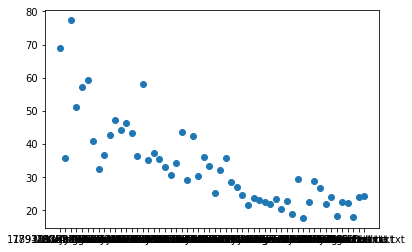

In [16]:
#without commas
plt.scatter(names,presidents_avg_words_per_sentence)
plt.show()

Now we try to do the same thing for hapaxes.

In corpus linguistics, a hapax legomenon is a word that occurs only once within a context/speech.

The graph is decreasing.

In [17]:
presidents_hapaxes=[]
for x in names:
    words=nltk.FreqDist(inaugural.words(fileids = x))
    presidents_hapaxes.append(len(words.hapaxes())/len(words))

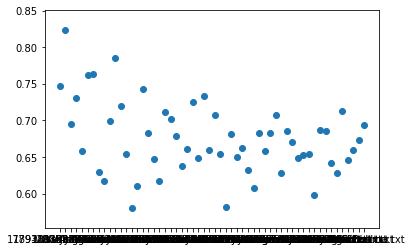

In [18]:
plt.scatter(names,presidents_hapaxes)
plt.show()

Finally we calculate the syllable per word used by each president in his speech, we use pyphen library for this as normally nouns like "Afghasnistan" have no predefined number of syllabes.

We then take the average syllable per word for each president and plot it.

When we see the graph, we see that it has decreased over time.

In [19]:
dic = pyphen.Pyphen(lang='en')
def noofsyllabes(corpus):
    num=0
    for x in corpus:
        s=dic.inserted(x)
        num=num+s.count('-')+1
    return num

In [20]:
presidents_avg=[]
for x in names:
    words=list(nltk.FreqDist(inaugural.words(fileids = x)))
    for s in stop_words:
        if s in words:
            words.remove(s)
    n=noofsyllabes(words)/len(words)
    presidents_avg.append(n)

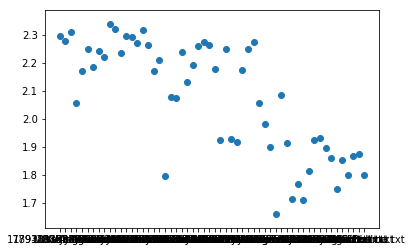

In [21]:
plt.scatter(names,presidents_avg)
plt.show()